In [ ]:
%pip install tensorflow keras

In [3]:
from keras.datasets import mnist

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

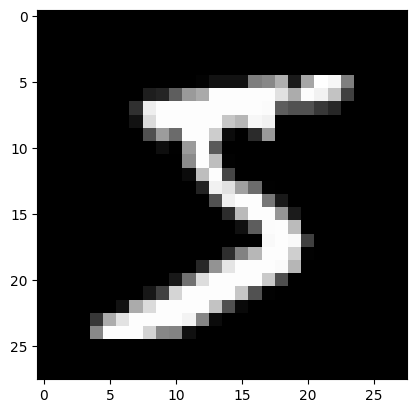

In [9]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap='gray')

In [10]:
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0

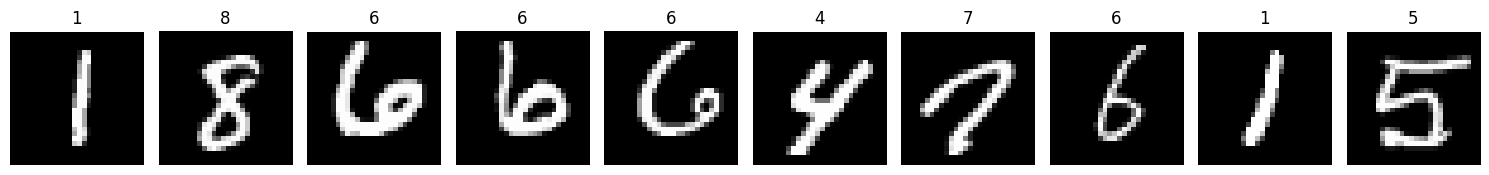

In [14]:
import numpy as np

indices = np.random.choice(len(x_train_normalized), 10, replace=False)
plt.figure(figsize=(15, 3))
for i, idx in enumerate(indices):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train_normalized[idx], cmap='gray')
    plt.title(str(y_train[idx]))
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn import svm
n_samples = len(x_train_normalized)
x = x_train_normalized.reshape((n_samples, -1))[:5000]
y = y_train[:5000]

SVC(gamma=0.001)

In [26]:

clf = svm.SVC(kernel="rbf", gamma=0.001)
clf.fit(x, y)

SVC(gamma=0.001)

In [21]:
test = x_test_normalized.reshape((len(x_test_normalized), -1))[:1000]
predicted = clf.predict(test)
y_test_subset = y_test[:1000]

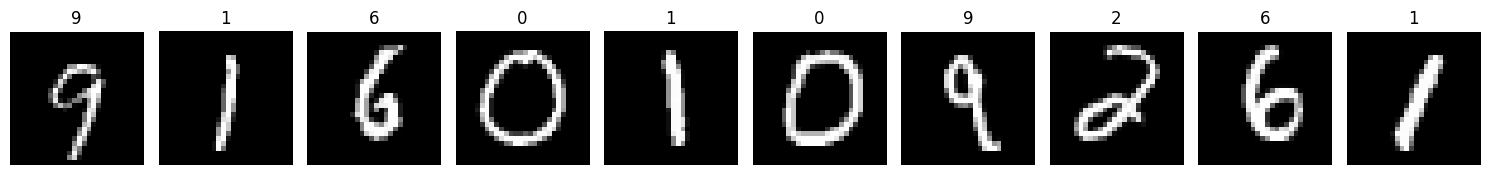

In [22]:
plt.figure(figsize=(15, 3))
random_indices = np.random.choice(len(test), 10, replace=False)
for i, idx in enumerate(random_indices):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_test_normalized[idx], cmap='gray')
    plt.title(str(predicted[idx]))
    plt.axis('off')
plt.tight_layout()
plt.show()

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print(classification_report(y_test_subset, predicted))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94        85
           1       0.92      0.98      0.95       126
           2       0.92      0.84      0.88       116
           3       0.90      0.80      0.85       107
           4       0.89      0.92      0.90       110
           5       0.79      0.89      0.83        87
           6       0.89      0.91      0.90        87
           7       0.88      0.82      0.85        99
           8       0.84      0.80      0.82        89
           9       0.84      0.89      0.87        94

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000



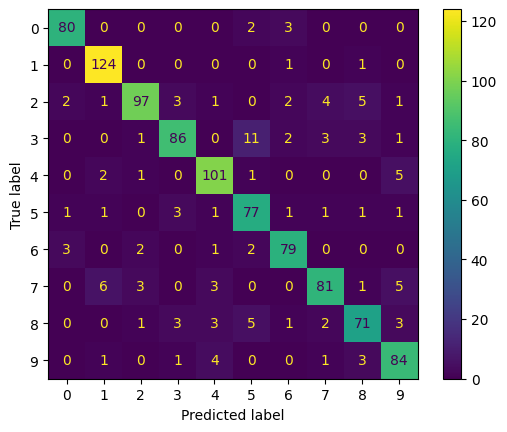

In [24]:
disp = ConfusionMatrixDisplay.from_predictions(y_test_subset, predicted)
plt.show()

In [28]:
clf_faster = svm.SVC(kernel="linear", C=0.1)
clf_faster.fit(x, y)

SVC(C=0.1, kernel='linear')

In [29]:
predicted_faster = clf_faster.predict(test)

In [32]:
print(classification_report(y_test_subset, predicted_faster))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        85
           1       0.97      0.99      0.98       126
           2       0.94      0.88      0.91       116
           3       0.90      0.88      0.89       107
           4       0.90      0.94      0.92       110
           5       0.85      0.89      0.87        87
           6       0.93      0.92      0.92        87
           7       0.88      0.87      0.87        99
           8       0.87      0.84      0.86        89
           9       0.86      0.86      0.86        94

    accuracy                           0.91      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.91      0.91      0.90      1000



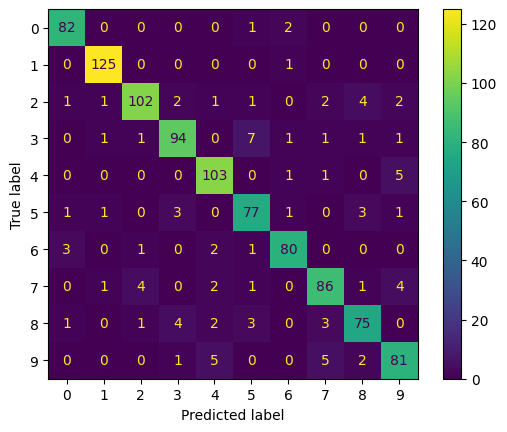

In [31]:
disp = ConfusionMatrixDisplay.from_predictions(y_test_subset, predicted_faster)
plt.show()

In [ ]:
# PCA Principal Component Analysis
from sklearn.decomposition import PCA
pca_2D = PCA(n_components=2)
pca_2D.fit(x)
x_2D = pca_2D.transform(x)
x_2D.shape

(5000, 2)

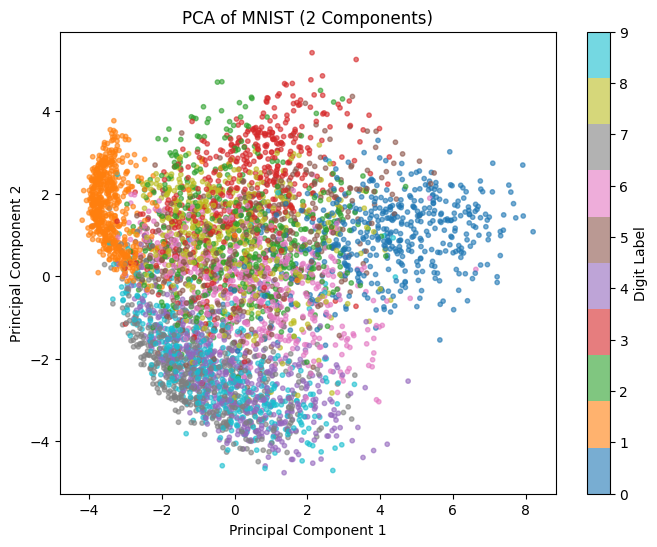

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(x_2D[:, 0], x_2D[:, 1], c=y, cmap='tab10', alpha=0.6, s=10)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of MNIST (2 Components)')
plt.colorbar(label='Digit Label')
plt.show()

In [35]:
clf_2D = svm.SVC(kernel="rbf", gamma=0.001)
clf_2D.fit(x_2D, y)
test_2D = pca_2D.transform(test)
predicted_pca = clf_2D.predict(test_2D)

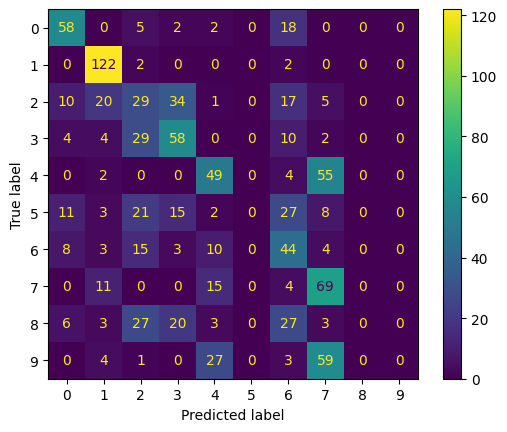

In [36]:
disp = ConfusionMatrixDisplay.from_predictions(y_test_subset, predicted_pca)
plt.show()

In [37]:
pca_10D = PCA(n_components=10)
pca_10D.fit(x)
x_10D = pca_10D.transform(x)
x_10D.shape

(5000, 10)

In [39]:
clf_10D = svm.SVC(kernel="rbf", gamma=0.001)
clf_10D.fit(x_10D, y)
test_10D = pca_10D.transform(test)
predicted_pca10 = clf_10D.predict(test_10D)

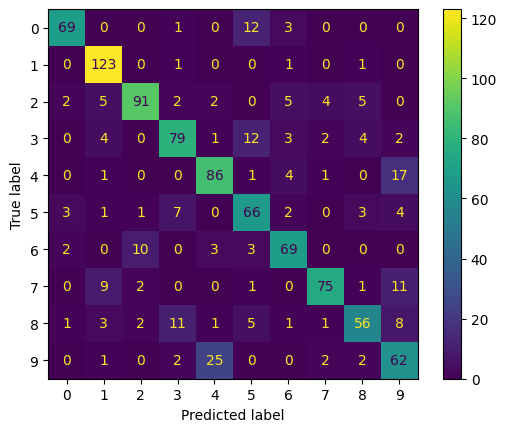

In [40]:
disp = ConfusionMatrixDisplay.from_predictions(y_test_subset, predicted_pca10)
plt.show()

# Grid Search

In [47]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'gamma': [0.0001, 0.001, 0.01, 0.1]
}
grid_clf = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=3, n_jobs=-1)
grid_clf.fit(x[:1000], y[:1000])

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [44]:
clf_best = grid_clf.best_estimator_
grid_clf.best_params_

{'C': 10, 'gamma': 0.01}

In [52]:
grid_clf.cv_results_["mean_test_score"].reshape(len(param_grid['C']), len(param_grid['gamma']))

array([[0.14903227, 0.14903227, 0.14903227, 0.14703026],
       [0.14903227, 0.14903227, 0.67804032, 0.15702829],
       [0.14903227, 0.79700059, 0.88499877, 0.66499134],
       [0.79800159, 0.86900074, 0.89500878, 0.68698938]])

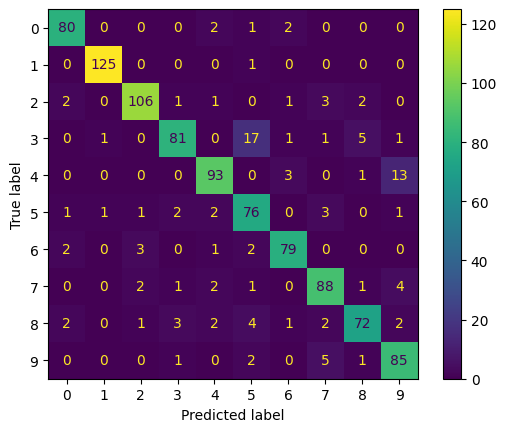

In [50]:
predicted_best = clf_best.predict(test)
disp = ConfusionMatrixDisplay.from_predictions(y_test_subset, predicted_best)